In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import shutil

In [7]:
"""From https://github.com/ritwikraha/EDGE-DETECTOR"""

def morphoedgedetect(imgj):
    kernel = np.ones((2,2),np.uint8)

    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    dilation = cv2.dilate(closing,kernel,iterations = 1)

    gradient = cv2.morphologyEx(dilation, cv2.MORPH_GRADIENT, kernel)


    edges_inv = cv2.bitwise_not(gradient)

    def psnr(imgORI, imgFIN):
        mse = np.mean( (imgORI - imgFIN) ** 2 )
        if mse == 0:
            return 100
        PIXEL_MAX = 255.0
        return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


    def thres(imgk):
        imgbinar = cv2.adaptiveThreshold(imgk,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,4)
        
        return imgbinar

    imgbinary= thres(edges_inv)
    d=psnr(edges_inv,imgbinary)
    if d<=psnr(img,gradient):
        imgF = cv2.addWeighted(imgbinary, 0.3, edges_inv, 0.7, 0)


    imgF = cv2.addWeighted(imgbinary, 0.5, edges_inv, 0.5, 0)

    return imgF

(512, 512)

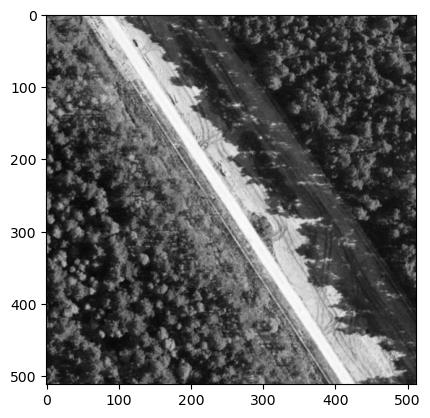

In [8]:
img = cv2.imread('./test.jpg', 0)
plt.imshow(img, cmap='gray')

img = morphoedgedetect(img)
img.shape

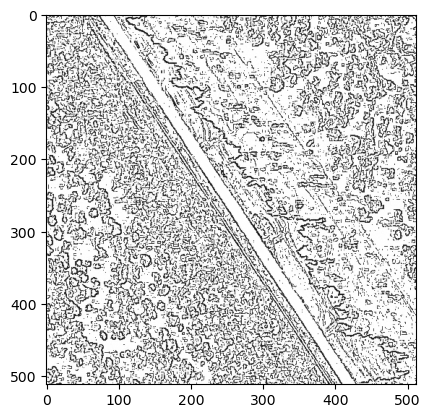

In [9]:
plt.imshow(img, cmap='gray')

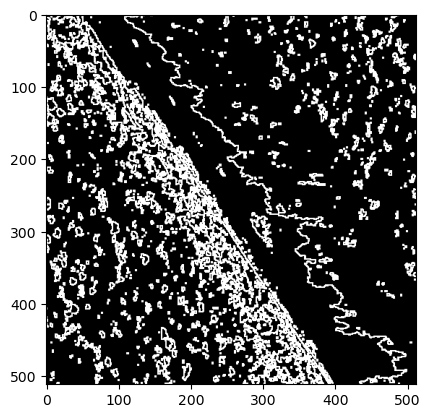

In [11]:
img = cv2.imread('./test.jpg', 0)
  
# binarize the image
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# define the kernel
kernel = np.ones((3, 3), np.uint8)
# invert the image
invert = cv2.bitwise_not(binr)

In [ ]:
morph_gradient = cv2.morphologyEx(invert,
                                  cv2.MORPH_GRADIENT, 
                                  kernel)
  
plt.imshow(morph_gradient, cmap='gray')

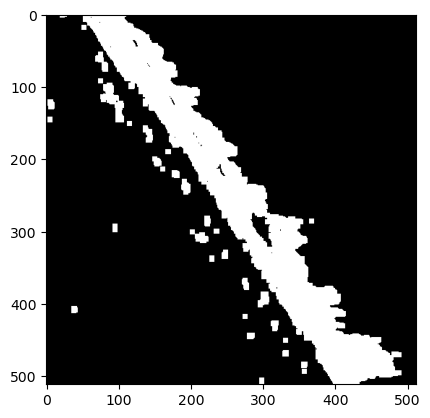

In [12]:
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN,
                           kernel, iterations=3)

plt.imshow(opening, cmap='gray')

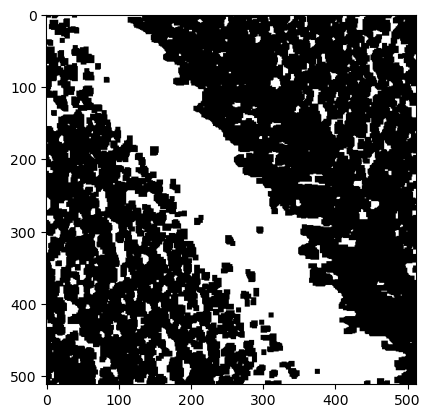

In [13]:
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=3)
  
plt.imshow(closing, cmap='gray')